In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data/height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Height vs Weight')

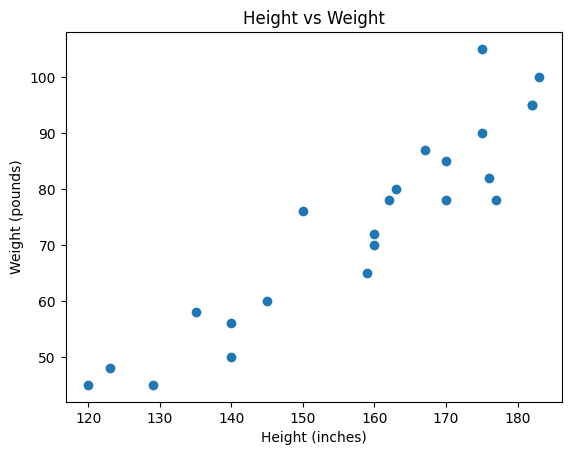

In [4]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Height vs Weight')

In [5]:
X_train = df[['Weight']]
y_train = df['Height']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17, 1), (6, 1), (17,), (6,))

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred = linear_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Linear Regression - MSE: {mse}, R2: {r2}, MAE: {mae}")

Linear Regression - MSE: 114.84069295228699, R2: 0.7360826717981276, MAE: 9.66512588679501


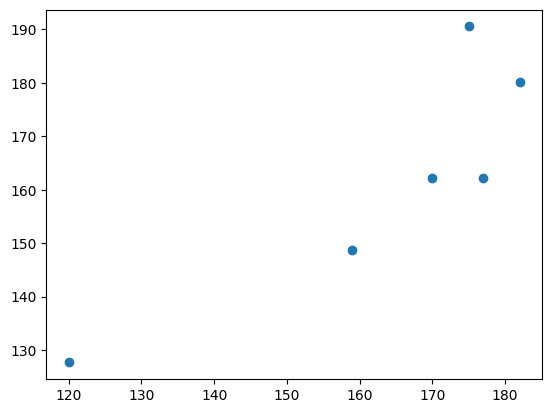

In [10]:
plt.scatter(y_test, y_pred)

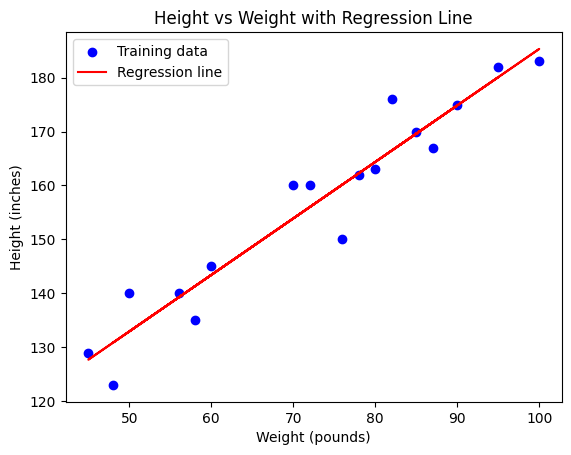

In [13]:
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, linear_model.predict(X_train_scaled), color='red', label='Regression line')
plt.xlabel('Weight (pounds)')
plt.ylabel('Height (inches)')
plt.title('Height vs Weight with Regression Line')
plt.legend()
plt.show()

In [16]:
## Prediction for a new data point
new_weight = np.array([[75]])  # Example weight in pounds
new_weight_scaled = scaler.transform(new_weight)
predicted_height = linear_model.predict(new_weight_scaled)
print(f"Predicted height for weight {new_weight[0][0]} pounds: {predicted_height[0]} inches")

Predicted height for weight 75 pounds: 159.12122212627622 inches


/Users/olutolaoloruntobipaul/Desktop/Projects/ml-algorithm/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


/var/folders/k5/h5f0st755j93yh496pf0gwtr0000gn/T/ipykernel_73494/1420677072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


<Axes: xlabel='Height', ylabel='Density'>

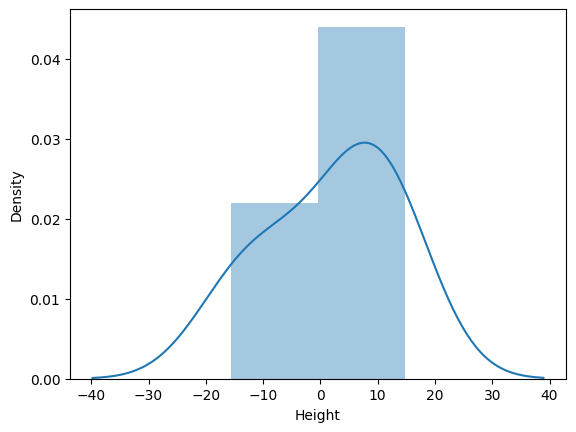

In [23]:
residuals = y_test - y_pred
sns.distplot(residuals, kde=True)

In [24]:
residuals

15    14.735003
9      7.735003
0     -7.683471
8      1.920277
17    10.358028
12   -15.558973
Name: Height, dtype: float64